# Convolutional neural networks

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import torchvision.models as models

CNNs apply sequences of filters to incoming signals that we want to represent or classify. We'll look at a popular image classifier called *AlexNet*, which has proven very successful at classifying images. This version of the classifier has been pretrained on a large dataset called *ImageNet*.

In [29]:
alexnet = models.alexnet(pretrained=True)

We'll display the parameters of AlexNet below. It consists of several layers that successively apply filters to the incoming image, do a bit of (non-linear) pre-processing, and send the output to the next convolutional layer. Finally, after doing all of the filtering, the convolutional features are fed into a classifier that decides which of 1000 different types of images it thinks it sees.

In [51]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096,

We can look at the filters at each of the layers.

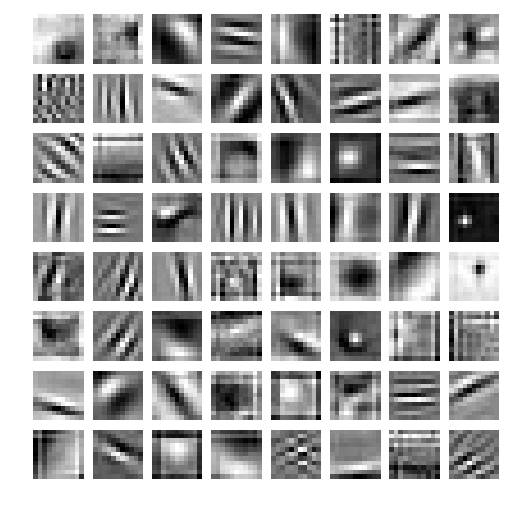

In [48]:
FILTERS_TO_SHOW = 8

plt.figure(figsize=(6, 6))
for i in range(0,FILTERS_TO_SHOW**2):
    plt.subplot(FILTERS_TO_SHOW, FILTERS_TO_SHOW, i + 1)
    plt.imshow(alexnet.features[0].weight[i,0,:,:].data.numpy(),cmap=plt.cm.gray,interpolation="nearest")
    plt.axis('off')

plt.show()

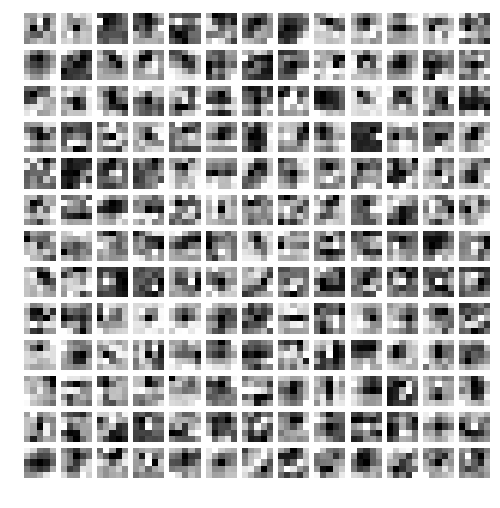

In [49]:
FILTERS_TO_SHOW = 13

plt.figure(figsize=(6, 6))
for i in range(0,FILTERS_TO_SHOW**2):
    plt.subplot(FILTERS_TO_SHOW, FILTERS_TO_SHOW, i + 1)
    plt.imshow(alexnet.features[3].weight[i,0,:,:].data.numpy(),cmap=plt.cm.gray,interpolation="nearest")
    plt.axis('off')

plt.show()

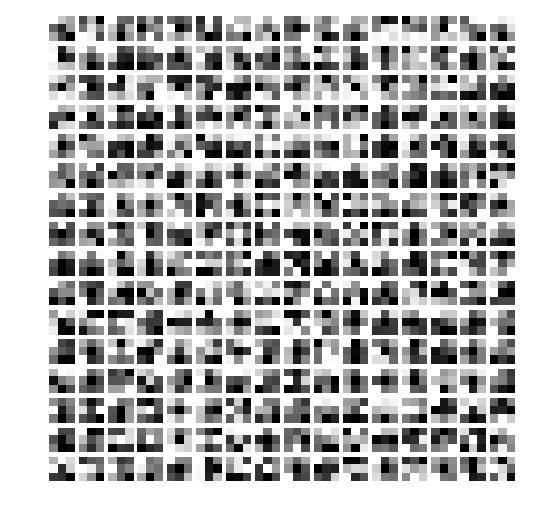

In [50]:
FILTERS_TO_SHOW = 16

plt.figure(figsize=(6, 6))
for i in range(0,FILTERS_TO_SHOW**2):
    plt.subplot(FILTERS_TO_SHOW, FILTERS_TO_SHOW, i + 1)
    plt.imshow(alexnet.features[10].weight[i,0,:,:].data.numpy(),cmap=plt.cm.gray,interpolation="nearest")
    plt.axis('off')

plt.show()

We can see that (1) we get more filters as we go deeper into the network, and (2) the filters become more abstract. The first layer has filters that "classical" signal processing can recognize as looking for edges or content at particular frequencies. As we go further, this intuition breaks down.